# Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import warnings

%matplotlib inline

ratings = pd.read_table("http://www.tau.ac.il/~saharon/StatsLearn2018/train_ratings_all.dat", header = None)
miss_cong = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/train_y_rating.dat", header = None, names = ['score'])
movies = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/movie_titles.txt", header = None, names = ['year', 'title'])

# Peek at the data

In [2]:
print('no. of raters: %d, no. of movies: %d' % ratings.shape)
print('no. of miss_cong raters: %d, no. of movies: %d' % miss_cong.shape)
print()
print('first 4 movies, first 6 raters:')
print(ratings.values[:6, :4]) #notice ratings is still a pandas DataFrame, its `values` field is its numpy 2d array (matrix)
print()
print('head of movies DataFrame:')
print(movies.head())

no. of raters: 10000, no. of movies: 99
no. of miss_cong raters: 10000, no. of movies: 1

first 4 movies, first 6 raters:
[[2 4 4 4]
 [4 5 3 3]
 [5 5 5 5]
 [3 3 3 4]
 [4 4 4 5]
 [4 3 3 4]]

head of movies DataFrame:
   year                                              title
0  1996                                   Independence Day
1  2000                                        The Patriot
2  2004                             The Day After Tomorrow
3  2003  Pirates of the Caribbean: The Curse of the Bla...
4  1990                                       Pretty Woman


# Missing Data Exploration

## General

In [3]:
# putting None's for zeros
ratings[ratings == 0] = None

total_missing = np.sum(np.isnan(ratings.values))
total_obs = np.prod(ratings.shape)

print('total missing values: %d out of total observations: %d' % (total_missing, total_obs))
print('so that\'s %.2f missing' % (total_missing / total_obs))

total missing values: 152414 out of total observations: 990000
so that's 0.15 missing


## Marginal on Movies

In [4]:
# n missing per movie, adding it is another column of movies
missing_per_movie = np.isnan(ratings.values).sum(axis=0)
movies['n_missing'] = missing_per_movie

movies.head(20)

year                                              title  n_missing
0   1996                                   Independence Day          0
1   2000                                        The Patriot          0
2   2004                             The Day After Tomorrow          0
3   2003  Pirates of the Caribbean: The Curse of the Bla...          0
4   1990                                       Pretty Woman          0
5   1994                                       Forrest Gump          0
6   1999                                     The Green Mile          0
7   1997                                            Con Air          0
8   1996                                            Twister          0
9   2002                                 Sweet Home Alabama          0
10  2001                                       Pearl Harbor          0
11  1998                                         Armageddon          0
12  1996                                           The Rock          0
13  2000                                    What Women Want          0
14  2003                                     Bruce Almighty        854
15  2001                                      Oceans Eleven        788
16  2002                                The Bourne Identity        952
17  2003                                    The Italian Job       1338
18  2004                                            I Robot       1232
19  1999                                    American Beauty       2046

In [5]:
# finding n missing of a specific movie
movies.loc[movies['title'] == 'American Beauty', 'n_missing']

19    2046
Name: n_missing, dtype: int64

In [6]:
# finding min, max, median and mean movie per n_missing, ignoring first 14 movies with no missing at all
movies_with_missing = movies.iloc[14:, :]

def get_val_of_col_by_col(df, by, col, value):
    idx = (np.abs(df[by] - value)).idxmin() # taking id *closest* to value because mean is involved
    return df.at[idx, col]

min_n_missing = np.min(movies_with_missing['n_missing'])
min_n_missing_movie = get_val_of_col_by_col(movies_with_missing, 'n_missing', 'title', min_n_missing)

max_n_missing = np.max(movies_with_missing['n_missing'])
max_n_missing_movie = get_val_of_col_by_col(movies_with_missing, 'n_missing', 'title', max_n_missing)

median_n_missing = np.median(movies_with_missing['n_missing'])
median_n_missing_movie = get_val_of_col_by_col(movies_with_missing, 'n_missing', 'title', median_n_missing)

mean_n_missing = np.mean(movies_with_missing['n_missing'])
mean_n_missing_movie = get_val_of_col_by_col(movies_with_missing, 'n_missing', 'title', mean_n_missing)

print('movie with minimum n missing: %s, with %d missing' % (min_n_missing_movie, min_n_missing))
print('movie with maximum n missing: %s, with %d missing' % (max_n_missing_movie, max_n_missing))
print('movie with median n missing: %s, with %d missing' % (median_n_missing_movie, median_n_missing))
print('movie with mean n missing: %s, with %d missing' % (mean_n_missing_movie, mean_n_missing))

movie with minimum n missing: Gladiator, with 722 missing
movie with maximum n missing: Sideways, with 4702 missing
movie with median n missing: A Few Good Men, with 1638 missing
movie with mean n missing: The Bourne Supremacy, with 1793 missing


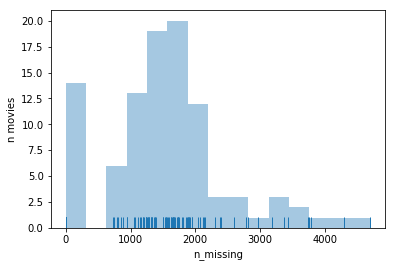

In [7]:
# histogram
sns.distplot(movies['n_missing'], kde=False, rug=True)
plt.ylabel('n movies')
plt.show()

## Marginal on Raters

In [8]:
# n missing per rater, creating a new DataFrame
raters = pd.DataFrame({'rater': range(ratings.shape[0])})
missing_per_rater = np.isnan(ratings.values).sum(axis=1)
raters['n_missing'] = missing_per_rater

raters.head(10)

rater  n_missing
0      0         17
1      1         13
2      2         28
3      3          4
4      4          9
5      5          8
6      6         22
7      7         19
8      8         52
9      9          6

In [9]:
# finding min, max, median and mean rater per n_missing
min_n_missing = np.min(raters['n_missing'])
min_n_missing_rater = get_val_of_col_by_col(raters, 'n_missing', 'rater', min_n_missing)

max_n_missing = np.max(raters['n_missing'])
max_n_missing_rater = get_val_of_col_by_col(raters, 'n_missing', 'rater', max_n_missing)

median_n_missing = np.median(raters['n_missing'])
median_n_missing_rater = get_val_of_col_by_col(raters, 'n_missing', 'rater', median_n_missing)

mean_n_missing = np.mean(raters['n_missing'])
mean_n_missing_rater = get_val_of_col_by_col(raters, 'n_missing', 'rater', mean_n_missing)

print('rater with minimum n missing: %s, with %d missing' % (min_n_missing_rater, min_n_missing))
print('rater with maximum n missing: %s, with %d missing' % (max_n_missing_rater, max_n_missing))
print('rater with median n missing: %s, with %d missing' % (median_n_missing_rater, median_n_missing))
print('rater with mean n missing: %s, with %d missing' % (mean_n_missing_rater, mean_n_missing))

rater with minimum n missing: 81, with 0 missing
rater with maximum n missing: 7007, with 71 missing
rater with median n missing: 1, with 13 missing
rater with mean n missing: 21, with 15 missing


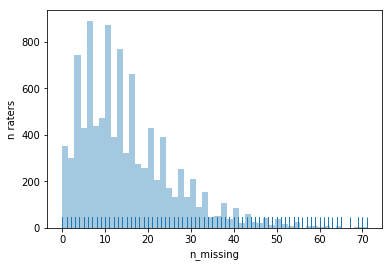

In [10]:
# histogram
sns.distplot(raters['n_missing'], kde=False, rug=True)
plt.ylabel('n raters')
plt.show()

# Scores Exploration (ignoring missing values)

## General

In [11]:
# min, max, median, mean:
print('min movies score: %.2f' % np.nanmin(ratings.values))
print('max movies score: %.2f' % np.nanmax(ratings.values))
print('median movies score: %.2f' % np.nanmedian(ratings.values))
print('mean movies score: %.2f' % np.nanmean(ratings.values))

min movies score: 1.00
max movies score: 5.00
median movies score: 4.00
mean movies score: 3.93


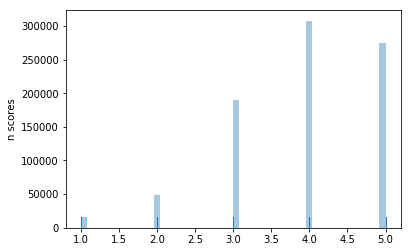

In [12]:
# histogram (barchart really)
sns.distplot(ratings.values[~np.isnan(ratings.values)], kde=False, rug=True)
plt.ylabel('n scores')
plt.show()

## Mean Scores, Marginal on Movies

In [13]:
# mean score per movie, adding it is another column of movies
mean_score_per_movie = np.nanmean(ratings.values, axis=0)
movies['mean_score'] = mean_score_per_movie

movies.head(10)

year                                              title  n_missing  \
0  1996                                   Independence Day          0   
1  2000                                        The Patriot          0   
2  2004                             The Day After Tomorrow          0   
3  2003  Pirates of the Caribbean: The Curse of the Bla...          0   
4  1990                                       Pretty Woman          0   
5  1994                                       Forrest Gump          0   
6  1999                                     The Green Mile          0   
7  1997                                            Con Air          0   
8  1996                                            Twister          0   
9  2002                                 Sweet Home Alabama          0   

   mean_score  
0      4.1463  
1      4.1073  
2      3.7045  
3      4.3482  
4      4.0748  
5      4.5143  
6      4.4563  
7      3.7287  
8      3.7546  
9      3.6749

In [14]:
# finding min, max, median and mean movie per mean_score
min_mean_score = np.min(movies['mean_score'])
min_mean_score_movie = get_val_of_col_by_col(movies, 'mean_score', 'title', min_mean_score)

max_mean_score = np.max(movies['mean_score'])
max_mean_score_movie = get_val_of_col_by_col(movies, 'mean_score', 'title', max_mean_score)

median_mean_score = np.median(movies['mean_score'])
median_mean_score_movie = get_val_of_col_by_col(movies, 'mean_score', 'title', median_mean_score)

mean_mean_score = np.mean(movies['mean_score'])
mean_mean_score_movie = get_val_of_col_by_col(movies, 'mean_score', 'title', mean_mean_score)

print('movie with minimum mean score: %s, with mean %.2f' % (min_mean_score_movie, min_mean_score))
print('movie with maximum mean score: %s, with mean %.2f' % (max_mean_score_movie, max_mean_score))
print('movie with median mean score: %s, with mean %.2f' % (median_mean_score_movie, median_mean_score))
print('movie with mean mean score: %s, with mean %.2f' % (mean_mean_score_movie, mean_mean_score))

movie with minimum mean score: The Royal Tenenbaums, with mean 2.73
movie with maximum mean score: The Shawshank Redemption Special Edition, with mean 4.63
movie with median mean score: Air Force One, with mean 3.91
movie with mean mean score: American Pie, with mean 3.91


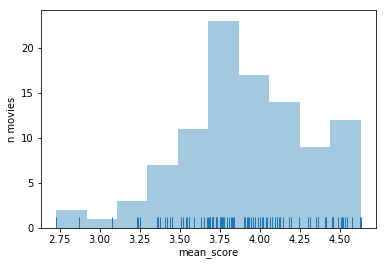

In [15]:
# histogram
sns.distplot(movies['mean_score'], kde=False, rug=True)
plt.ylabel('n movies')
plt.show()

## Mean Scores, Marginal on Raters

In [16]:
# mean score per rater, adding it is another column of raters
mean_score_per_rater = np.nanmean(ratings.values, axis=1)
raters['mean_score'] = mean_score_per_rater

raters.head(10)

rater  n_missing  mean_score
0      0         17    3.792683
1      1         13    2.895349
2      2         28    4.901408
3      3          4    3.736842
4      4          9    3.833333
5      5          8    3.582418
6      6         22    4.688312
7      7         19    4.287500
8      8         52    4.170213
9      9          6    3.903226

In [17]:
# finding min, max, median and mean rater per mean_score
min_mean_score = np.min(raters['mean_score'])
min_mean_score_rater = get_val_of_col_by_col(raters, 'mean_score', 'rater', min_mean_score)

max_mean_score = np.max(raters['mean_score'])
max_mean_score_rater = get_val_of_col_by_col(raters, 'mean_score', 'rater', max_mean_score)

median_mean_score = np.median(raters['mean_score'])
median_mean_score_rater = get_val_of_col_by_col(raters, 'mean_score', 'rater', median_mean_score)

mean_mean_score = np.mean(raters['mean_score'])
mean_mean_score_rater = get_val_of_col_by_col(raters, 'mean_score', 'rater', mean_mean_score)

print('rater with minimum mean score: %s, with mean %.2f' % (min_mean_score_rater, min_mean_score))
print('rater with maximum mean score: %s, with mean %.2f' % (max_mean_score_rater, max_mean_score))
print('rater with median mean score: %s, with mean %.2f' % (median_mean_score_rater, median_mean_score))
print('rater with mean mean score: %s, with mean %.2f' % (mean_mean_score_rater, mean_mean_score))

rater with minimum mean score: 3961, with mean 2.04
rater with maximum mean score: 957, with mean 5.00
rater with median mean score: 7404, with mean 3.93
rater with mean mean score: 857, with mean 3.93


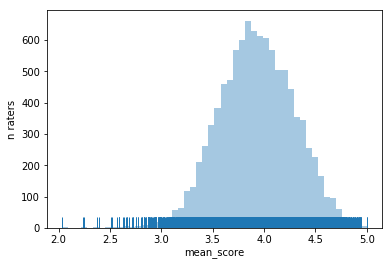

In [18]:
# histogram
sns.distplot(raters['mean_score'], kde=False, rug=True)
plt.ylabel('n raters')
plt.show()

## Mean Scores, Marginal on Release Year

**Warning**: a lot of pandas magic ahead.

In [19]:
# first, "attach" year to ratings:
ratings_by_year = ratings.T # transpose
ratings_by_year['year'] = movies['year'] # add new column
ratings_by_year.head(10)

0    1    2    3    4    5    6    7    8    9  ...   9991  9992  9993  \
0  2.0  4.0  5.0  3.0  4.0  4.0  5.0  3.0  5.0  4.0  ...    4.0   4.0   4.0   
1  4.0  5.0  5.0  3.0  4.0  3.0  4.0  5.0  5.0  4.0  ...    3.0   5.0   5.0   
2  4.0  3.0  5.0  3.0  4.0  3.0  5.0  3.0  5.0  4.0  ...    3.0   5.0   4.0   
3  4.0  3.0  5.0  4.0  5.0  4.0  5.0  4.0  5.0  4.0  ...    4.0   4.0   5.0   
4  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  5.0  5.0  ...    5.0   5.0   5.0   
5  3.0  3.0  5.0  5.0  5.0  5.0  5.0  5.0  3.0  4.0  ...    5.0   5.0   5.0   
6  4.0  3.0  5.0  4.0  5.0  4.0  5.0  5.0  5.0  5.0  ...    5.0   5.0   5.0   
7  2.0  2.0  5.0  3.0  4.0  4.0  5.0  3.0  5.0  4.0  ...    4.0   5.0   3.0   
8  3.0  3.0  5.0  3.0  4.0  3.0  5.0  2.0  5.0  4.0  ...    2.0   5.0   4.0   
9  4.0  3.0  5.0  4.0  4.0  3.0  5.0  5.0  4.0  3.0  ...    2.0   5.0   4.0   

   9994  9995  9996  9997  9998  9999  year  
0   4.0   5.0   3.0   4.0   4.0   2.0  1996  
1   2.0   5.0   3.0   5.0   4.0   4.0  2000  
2   2.0   5.0   3.0   3.0   4.0   2.0  2004  
3   2.0   5.0   3.0   5.0   4.0   4.0  2003  
4   4.0   5.0   5.0   3.0   2.0   4.0  1990  
5   4.0   5.0   5.0   5.0   4.0   5.0  1994  
6   3.0   5.0   4.0   4.0   3.0   3.0  1999  
7   5.0   5.0   1.0   4.0   3.0   3.0  1997  
8   5.0   5.0   3.0   3.0   2.0   5.0  1996  
9   3.0   5.0   3.0   3.0   3.0   4.0  2002  

[10 rows x 10001 columns]

In [20]:
# Then, "melt" DataFrame, so each year will have each score in a separate line
ratings_by_year = pd.melt(ratings_by_year, id_vars=['year'], value_vars=list(range(99)))
ratings_by_year.columns = ['year', 'movie_id', 'score']
ratings_by_year.head()

year movie_id  score
0  1996        0    2.0
1  2000        0    4.0
2  2004        0    4.0
3  2003        0    4.0
4  1990        0    5.0

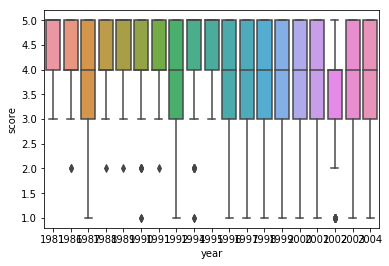

In [21]:
# boxplots are problematic on a 1 to 5 scale...
sns.boxplot('year', 'score', data = ratings_by_year)
plt.show()

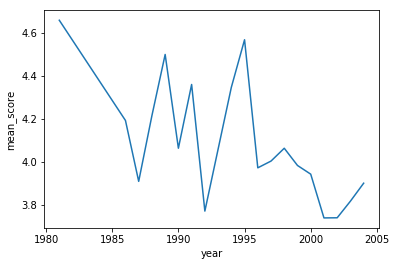

In [22]:
# so we can get mean score per year and use a simple line chart
ratings_by_year = ratings_by_year.groupby('year')['score'].mean().reset_index()
ratings_by_year.columns = ['year', 'mean_score']
sns.lineplot('year', 'mean_score', data = ratings_by_year)
plt.show()

# Pairwise Correlations

## General

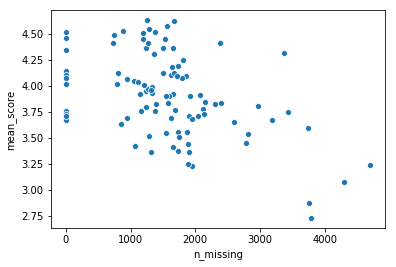

Pearson r correlation: -0.44


In [23]:
# is a movie "missingness" correlated with its mean score?
sns.scatterplot('n_missing', 'mean_score', data = movies)
plt.show()

print('Pearson r correlation: %.2f' % pearsonr(movies['n_missing'], movies['mean_score'])[0])

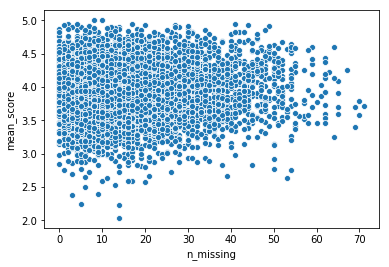

Pearson r correlation: 0.04


In [24]:
# is a rater's "missingness" correlated with her mean score?
sns.scatterplot('n_missing', 'mean_score', data = raters)
plt.show()

print('Pearson r correlation: %.2f' % pearsonr(raters['n_missing'], raters['mean_score'])[0])

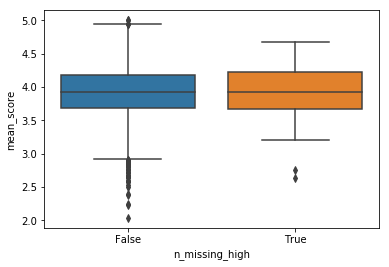

In [25]:
# it looked to me like with very high "missingness" the mean score is lower, but:
raters['n_missing_high'] = raters['n_missing'] > 50
sns.boxplot('n_missing_high', 'mean_score', data = raters)
plt.show()

## Marginal on Movies

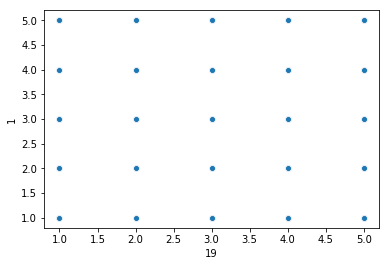

In [26]:
# look at a scatterplot of two specific movies, ignoring missing observations
def scatter_movies(mov1, mov2):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov2_id = movies.index[movies['title'] == mov2][0]
    sns.scatterplot(mov1_id, mov2_id, data = ratings)
    plt.show()
    
scatter_movies('American Beauty', 'The Patriot')

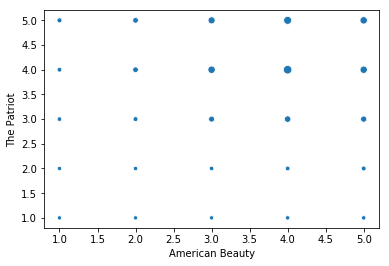

In [27]:
# oops, either use boxplots or make dots diameter proportional to group's size
def scatter_movies(mov1, mov2):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov2_id = movies.index[movies['title'] == mov2][0]
    mov1_scores = ratings.values[:, mov1_id]
    mov2_scores = ratings.values[:, mov2_id]
    nas = np.logical_or(np.isnan(mov1_scores), np.isnan(mov2_scores))
    agg_data = pd.DataFrame({'mov1': mov1_scores[~nas], 'mov2': mov2_scores[~nas]}).groupby(['mov1', 'mov2']).size().reset_index()
    agg_data.columns = [mov1, mov2, 'count']
    sns.scatterplot(mov1, mov2, size = 'count', data = agg_data, legend = False)
    plt.show()
scatter_movies('American Beauty', 'The Patriot')

In [28]:
# look at correlation of two specific movies
def corr_movies(mov1, mov2):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov2_id = movies.index[movies['title'] == mov2][0]
    mov1_scores = ratings.values[:, mov1_id]
    mov2_scores = ratings.values[:, mov2_id]
    nas = np.logical_or(np.isnan(mov1_scores), np.isnan(mov2_scores))
    return pearsonr(mov1_scores[~nas], mov2_scores[~nas])[0]

corr_movies('American Beauty', 'The Patriot')

-0.048502999654687982

In [29]:
# get all movies 99 * (99 - 1) / 2 pairwise correlations
movies_titles = movies['title'].values
pair_counter = 0
pair_corrs = dict()
for i in range(len(movies_titles) - 1):
    for j in range(i + 1, len(movies_titles)):
        mov1 = movies_titles[i]
        mov2 = movies_titles[j]
        pair_corrs[pair_counter] = {'mov1': mov1, 'mov2': mov2, 'corr': corr_movies(mov1, mov2)}
        pair_counter += 1
pair_corrs_df = pd.DataFrame.from_dict(pair_corrs, 'index')
pair_corrs_df.head(10)

mov1                                               mov2  \
0  Independence Day                                        The Patriot   
1  Independence Day                             The Day After Tomorrow   
2  Independence Day  Pirates of the Caribbean: The Curse of the Bla...   
3  Independence Day                                       Pretty Woman   
4  Independence Day                                       Forrest Gump   
5  Independence Day                                     The Green Mile   
6  Independence Day                                            Con Air   
7  Independence Day                                            Twister   
8  Independence Day                                 Sweet Home Alabama   
9  Independence Day                                       Pearl Harbor   

       corr  
0  0.247979  
1  0.306479  
2  0.196642  
3  0.182783  
4  0.147100  
5  0.189265  
6  0.321706  
7  0.378102  
8  0.194208  
9  0.258672

In [30]:
# pair of movies with highest correlation:
max_corr_pair_id = pair_corrs_df['corr'].idxmax()
max_pair = pair_corrs_df.iloc[max_corr_pair_id, :].values.tolist()
print('movie1: %s, movie2: %s, correlation: %.2f' % (max_pair[0], max_pair[1], max_pair[2]))

movie1: Lord of the Rings: The Two Towers, movie2: Lord of the Rings: The Fellowship of the Ring, correlation: 0.80


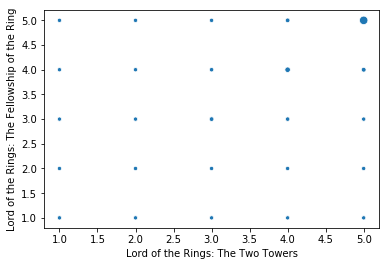

In [31]:
# see how the scatterplot of these raters look like
scatter_movies(max_pair[0], max_pair[1])

In [32]:
# pair of movies with lowest correlation:
min_corr_pair_id = pair_corrs_df['corr'].idxmin()
min_pair = pair_corrs_df.iloc[min_corr_pair_id, :].values.tolist()
print('movie1: %s, movie2: %s, correlation: %.2f' % (min_pair[0], min_pair[1], min_pair[2]))

movie1: Pearl Harbor, movie2: The Royal Tenenbaums, correlation: -0.17


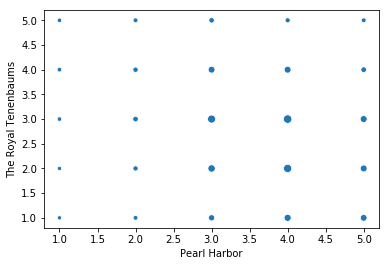

In [33]:
# see how the scatterplot of these movies look like
scatter_movies(min_pair[0], min_pair[1])

But beware: what would be the correlation between two movies all 10K raters chose to give a perfect rating?

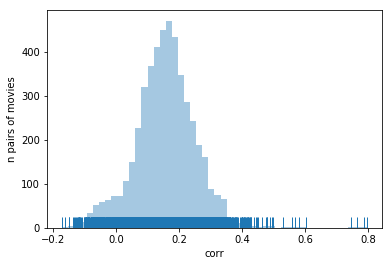

In [34]:
# histogram
sns.distplot(pair_corrs_df['corr'], kde=False, rug=True)
plt.ylabel('n pairs of movies')
plt.show()

# Marginal on Raters

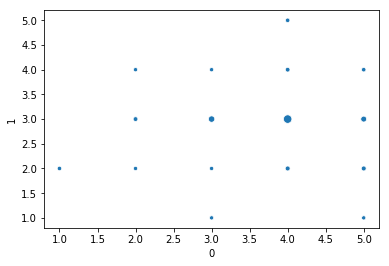

In [35]:
# look at a scatterplot of two specific raters, ignoring missing observations, making marker diameter proportional to group size
def scatter_raters(rater1, rater2):
    rater1_scores = ratings.values[rater1, :]
    rater2_scores = ratings.values[rater2, :]
    nas = np.logical_or(np.isnan(rater1_scores), np.isnan(rater2_scores))
    agg_data = pd.DataFrame({'rater1': rater1_scores[~nas], 'rater2': rater2_scores[~nas]}).groupby(['rater1', 'rater2']).size().reset_index()
    agg_data.columns = [rater1, rater2, 'count']
    sns.scatterplot(rater1, rater2, size = 'count', data = agg_data, legend = False)
    plt.show()
scatter_raters(0, 1)

In [36]:
# look at correlation of two specific raters
def corr_raters(rater1, rater2):
    rater1_scores = ratings.values[rater1, :]
    rater2_scores = ratings.values[rater2, :]
    nas = np.logical_or(np.isnan(rater1_scores), np.isnan(rater2_scores))
    return pearsonr(rater1_scores[~nas], rater2_scores[~nas])[0]

corr_raters(0, 1)

0.06245887897166847

In [37]:
# now, looking at all 10K * (10K - 1) / 2 pairwise correlations is time consuming, let's sample 10K *pairs* of raters
n = 10000
pair_corrs = dict()
for i in range(n):
    rater1, rater2 = np.random.choice(range(raters.shape[0]), 2, replace = False)
    pair_corrs[i] = {'rater1': rater1, 'rater2': rater2, 'corr': corr_raters(rater1, rater2)}
pair_corrs_df = pd.DataFrame.from_dict(pair_corrs, 'index')
pair_corrs_df.head(10)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


rater1  rater2      corr
0    2593    9420  0.178585
1    3578    6952  0.011239
2    2696    9411  0.018020
3    1675    4473  0.362389
4    8187     781  0.183661
5    6111    7146  0.131592
6    1131    4803 -0.148519
7    9510    6084  0.258196
8    3183     552  0.123461
9    9057    3927  0.236583

In [38]:
# here more likely to get missing values (why?)
sum(np.isnan(pair_corrs_df['corr']))

2

In [39]:
# pair of raters with highest correlation:
max_corr_pair_id = pair_corrs_df['corr'].idxmax()
max_pair = pair_corrs_df.iloc[max_corr_pair_id, :].values.tolist()
print('rater1: %s, rater2: %s, correlation: %.2f' % (max_pair[0], max_pair[1], max_pair[2]))

rater1: 7641.0, rater2: 8944.0, correlation: 0.67


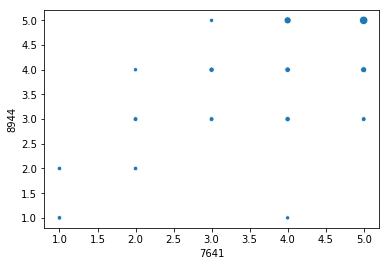

In [40]:
# see how the scatterplot of these raters look like
scatter_raters(int(max_pair[0]), int(max_pair[1]))

In [41]:
# pair of movies with lowest correlation:
min_corr_pair_id = pair_corrs_df['corr'].idxmin()
min_pair = pair_corrs_df.iloc[min_corr_pair_id, :].values.tolist()
print('rater1: %s, rater2: %s, correlation: %.2f' % (min_pair[0], min_pair[1], min_pair[2]))

rater1: 6585.0, rater2: 1047.0, correlation: -0.47


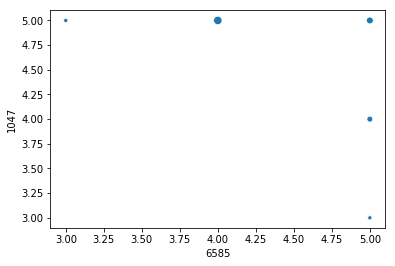

In [42]:
# see how the scatterplot of these raters look like
scatter_raters(int(min_pair[0]), int(min_pair[1]))

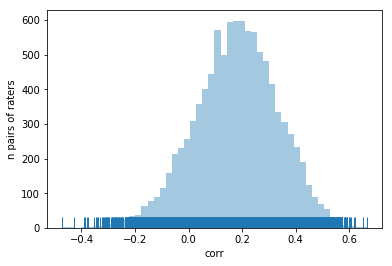

In [43]:
# histogram
pair_corrs_no_nans = pair_corrs_df['corr'][~np.isnan(pair_corrs_df['corr'])]
sns.distplot(pair_corrs_no_nans, kde=False, rug=True)
plt.ylabel('n pairs of raters')
plt.show()

# Correlation with Miss Congeniality

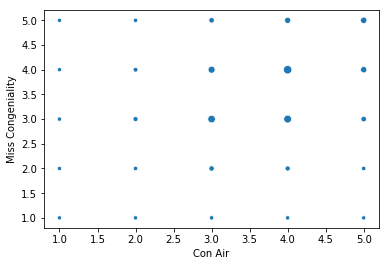

In [44]:
miss_cong_scores = miss_cong['score'].values

# see scatterplot of miss congeniality against another specific movie
def scatter_miss_cong(mov1):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov1_scores = ratings.values[:, mov1_id]
    nas = np.logical_or(np.isnan(mov1_scores), np.isnan(miss_cong_scores))
    agg_data = pd.DataFrame({'mov1': mov1_scores[~nas], 'mov2': miss_cong_scores[~nas]}).groupby(['mov1', 'mov2']).size().reset_index()
    agg_data.columns = [mov1, 'Miss Congeniality', 'count']
    sns.scatterplot(mov1, 'Miss Congeniality', size = 'count', data = agg_data, legend = False)
    plt.show()
scatter_miss_cong('Con Air')

In [45]:
# look at correlation of miss congeniality against another specific movie
def corr_miss_cong(mov1):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov1_scores = ratings.values[:, mov1_id]
    nas = np.logical_or(np.isnan(mov1_scores), np.isnan(miss_cong_scores))
    return pearsonr(mov1_scores[~nas], miss_cong_scores[~nas])[0]

corr_miss_cong('Con Air')

0.26409257070749775

In [46]:
# all Miss Congeniality's correlations with other movies
miss_cong_corrs = dict()
for i, mov1 in enumerate(movies_titles):
    miss_cong_corrs[i] = {'mov1': mov1, 'corr': corr_miss_cong(mov1)}
miss_cong_corrs_df = pd.DataFrame.from_dict(miss_cong_corrs, 'index')
miss_cong_corrs_df.head(10)

mov1      corr
0                                   Independence Day  0.241628
1                                        The Patriot  0.177594
2                             The Day After Tomorrow  0.258913
3  Pirates of the Caribbean: The Curse of the Bla...  0.184226
4                                       Pretty Woman  0.332299
5                                       Forrest Gump  0.057058
6                                     The Green Mile  0.157233
7                                            Con Air  0.264093
8                                            Twister  0.293391
9                                 Sweet Home Alabama  0.412030

In [47]:
# movie with highest correlation to Miss Congeniality:
max_corr_id = miss_cong_corrs_df['corr'].idxmax()
max_movie = miss_cong_corrs_df.iloc[max_corr_id, :].values.tolist()
print('movie with max corr to Miss congeniality: %s, correlation: %.2f' % (max_movie[0], max_movie[1]))

movie with max corr to Miss congeniality: The Wedding Planner, correlation: 0.43


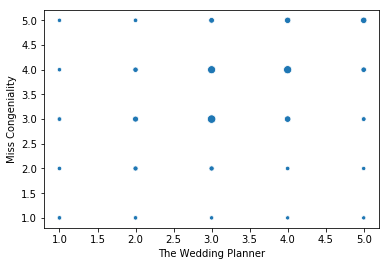

In [48]:
# see how the scatterplot looks like
scatter_miss_cong(max_movie[0])

In [49]:
# movie with lowest correlation to Miss Congeniality:
min_corr_id = miss_cong_corrs_df['corr'].idxmin()
min_movie = miss_cong_corrs_df.iloc[min_corr_id, :].values.tolist()
print('movie with min corr to Miss congeniality: %s, correlation: %.2f' % (min_movie[0], min_movie[1]))

movie with min corr to Miss congeniality: Pulp Fiction, correlation: -0.14


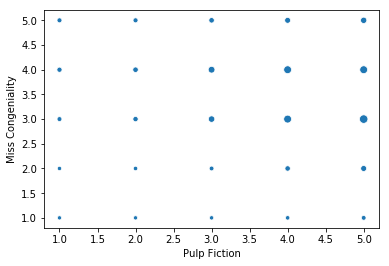

In [50]:
# see how the scatterplot looks like
scatter_miss_cong(min_movie[0])

# Miss Congeniality Conditional Distributions

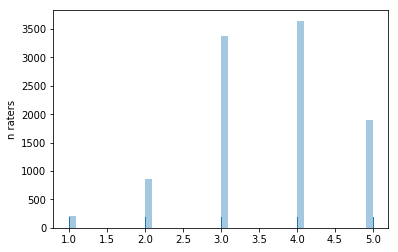

Miss Congeniality mean score is: 3.61


In [51]:
# first how does the marginal distirbution of Miss Congeniality look like?
sns.distplot(miss_cong_scores, kde=False, rug=True)
plt.ylabel('n raters')
plt.show()
print('Miss Congeniality mean score is: %.2f' % np.mean(miss_cong_scores))

## Conditional on Score

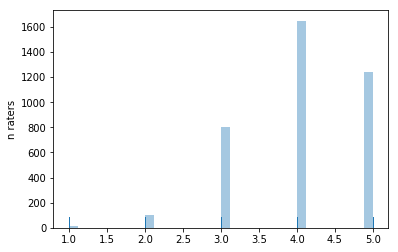

Miss Congeniality mean score is: 4.05


In [52]:
# how does it look like conditional on scoring high (4 or 5) on another movie?
def miss_cong_dist_cond_high(mov1, high_thresh = 4.0):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov1_scores = ratings.values[:, mov1_id]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        miss_cong_filtered = miss_cong_scores[mov1_scores >= high_thresh]
    sns.distplot(miss_cong_filtered, kde=False, rug=True)
    plt.ylabel('n raters')
    plt.show()
    print('Miss Congeniality mean score is: %.2f' % np.mean(miss_cong_filtered))
miss_cong_dist_cond_high('The Wedding Planner')

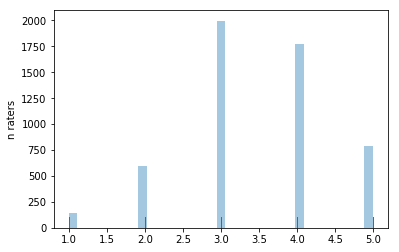

Miss Congeniality mean score is: 3.47


In [53]:
miss_cong_dist_cond_high('Pulp Fiction')

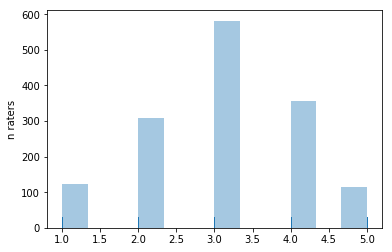

Miss Congeniality mean score is: 3.02


In [54]:
# how does it look like conditional on scoring low (1 or 2) on another movie?
def miss_cong_dist_cond_low(mov1, low_thresh = 2.0):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov1_scores = ratings.values[:, mov1_id]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        miss_cong_filtered = miss_cong_scores[mov1_scores <= low_thresh]
    sns.distplot(miss_cong_filtered, kde=False, rug=True)
    plt.ylabel('n raters')
    plt.show()
    print('Miss Congeniality mean score is: %.2f' % np.mean(miss_cong_filtered))
miss_cong_dist_cond_low('The Wedding Planner')

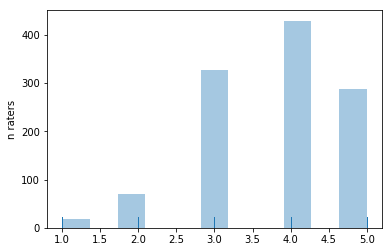

Miss Congeniality mean score is: 3.80


In [55]:
miss_cong_dist_cond_low('Pulp Fiction')

## Conditional on Missing Data Rate

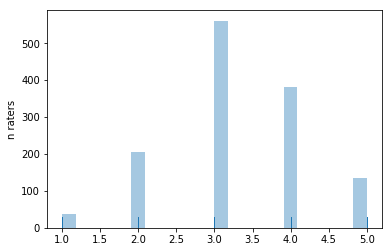

Miss Congeniality mean score is: 3.28


In [56]:
# how does it look like conditional on NOT scoring another movie (missing score)?
def miss_cong_dist_cond_missing(mov1):
    mov1_id = movies.index[movies['title'] == mov1][0]
    mov1_scores = ratings.values[:, mov1_id]
    mov1_na = np.isnan(mov1_scores)
    miss_cong_filtered = miss_cong_scores[mov1_na]
    sns.distplot(miss_cong_filtered, kde=False, rug=True)
    plt.ylabel('n raters')
    plt.show()
    print('Miss Congeniality mean score is: %.2f' % np.mean(miss_cong_filtered))
miss_cong_dist_cond_missing('The Wedding Planner')

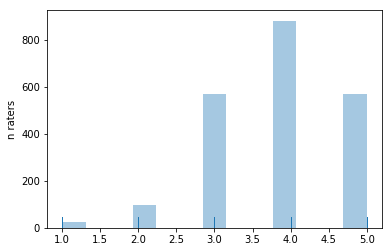

Miss Congeniality mean score is: 3.87


In [57]:
miss_cong_dist_cond_missing('Pulp Fiction')